In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import random

from scipy.sparse import csr_matrix

from sklearn.neighbors import NearestNeighbors

In [2]:
animes_info = pd.read_csv('animes.csv')
ratings_info = pd.read_csv('ratings.csv')
animes_info.head(10)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [4]:
ratings_info.head(5)

,user_id,anime_id,rating
0,1,20,-1.0
1,1,24,-1.0
2,1,79,-1.0
3,1,226,-1.0
4,1,241,-1.0


In [3]:
import pandas as pd

# Задаем список столбцов, которые будут использоваться при чтении файла
usecols = ['user_id', 'anime_id', 'rating']

# Задаем типы данных для каждого столбца
dtype = {'user_id': 'int32', 'anime_id': 'int32', 'rating': 'float32'}

# Читаем CSV файл с использованием параметров usecols и dtype
ratings_info = pd.read_csv('ratings.csv', usecols=usecols, dtype=dtype)

# Удаляем дубликаты
ratings_info = ratings_info.drop_duplicates(['user_id', 'anime_id'])

# Создаем сводную таблицу
rating_by_anime_list = ratings_info.pivot(index='anime_id', columns='user_id', values='rating')
rating_by_anime_list.fillna(0, inplace=True)

# Выводим первые строки сводной таблицы
print(rating_by_anime_list.head())


user_id   1      2      3      4      5      6      7      8      9      \
anime_id                                                                  
1           0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5           0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
6           0.0    0.0    0.0   -1.0    8.0    0.0    0.0    0.0    0.0   
7           0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
8           0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

user_id   10     ...  73507  73508  73509  73510  73511  73512  73513  73514  \
anime_id         ...                                                           
1           0.0  ...    9.0    0.0    0.0    0.0    0.0    0.0    9.0    0.0   
5           0.0  ...    8.0    0.0    0.0    0.0    0.0    0.0    8.0    0.0   
6           0.0  ...    9.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7           0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0

In [5]:
rating_by_anime_list = ratings_info.pivot(index = 'anime_id', columns = 'user_id', values = 'rating')
rating_by_anime_list.fillna(0, inplace = True)
rating_by_anime_list.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,73507,73508,73509,73510,73511,73512,73513,73514,73515,73516
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,10.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,10.0,0.0
6,0.0,0.0,0.0,-1.0,8.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
number_of_anime = ratings_info.groupby(['anime_id'])['rating'].count()
number_of_users = ratings_info.groupby(['user_id'])['rating'].count()

user_mask = number_of_users[number_of_users > 40].index
anime_mask = number_of_anime[number_of_anime > 10].index

rating_by_anime_list = rating_by_anime_list.loc[anime_mask, user_mask]

rating_by_anime_list.shape

(7658, 43174)

In [7]:
rating_by_anime_list = rating_by_anime_list.rename_axis(None, axis = 1).reset_index()
rating_by_anime_list.head()

,anime_id,1,3,4,5,7,11,13,14,17,...,73497,73499,73500,73501,73502,73503,73504,73507,73510,73515
0,1,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,9.0,10.0,9.0,0.0,10.0
1,5,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,10.0,8.0,0.0,10.0
2,6,0.0,0.0,-1.0,8.0,0.0,0.0,-1.0,0.0,7.0,...,0.0,9.0,0.0,0.0,0.0,9.0,9.0,9.0,0.0,10.0
3,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,0.0,7.0,0.0,0.0,0.0
4,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
csr_data = csr_matrix(rating_by_anime_list.reset_index().values)

In [9]:
neighbours = 20
knn = NearestNeighbors(n_neighbors = neighbours)

knn.fit(csr_data)

NearestNeighbors(n_neighbors=20)

In [13]:
rec_number = 15
anime_search = animes_info[animes_info['name'].str.contains('Hunter x Hunter')]
anime_search

,anime_id,name,genre,type,episodes,rating,members
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
112,136,Hunter x Hunter,"Action, Adventure, Shounen, Super Power",TV,62,8.48,166255
145,137,Hunter x Hunter OVA,"Action, Adventure, Shounen, Super Power",OVA,8,8.41,53168
146,139,Hunter x Hunter: Greed Island Final,"Action, Adventure, Shounen, Super Power",OVA,14,8.41,55787
202,138,Hunter x Hunter: Greed Island,"Action, Adventure, Shounen, Super Power",OVA,8,8.33,57029
1974,13271,Hunter x Hunter Movie: Phantom Rouge,"Action, Adventure, Shounen, Super Power",Movie,1,7.39,44589
2046,10189,Hunter x Hunter Pilot,"Action, Adventure, Shounen, Super Power",OVA,1,7.37,10375
2108,19951,Hunter x Hunter Movie: The Last Mission,"Action, Adventure, Shounen, Super Power",Movie,1,7.35,37633


In [14]:
anime_id = rating_by_anime_list[rating_by_anime_list['anime_id'] == anime_search.iloc[0]['anime_id']].index[0]
anime_id

5328

In [15]:
distances, indices = knn.kneighbors(csr_data[anime_id], n_neighbors = rec_number + 1)
indices_list = indices.squeeze().tolist()
distances_list = distances.squeeze().tolist()

indices_distances = list(zip(indices_list, distances_list))

print(indices_distances[:5])

[(5328, 0.0), (5326, 759.2167016076504), (5327, 759.3102132857163), (5331, 759.714420029), (5329, 759.8920976033373)]


In [16]:
indices_distances = indices_distances[1:]
indices_distances

[(5326, 759.2167016076504),
 (5327, 759.3102132857163),
 (5331, 759.714420029),
 (5329, 759.8920976033373),
 (5330, 760.0703914769999),
 (5335, 760.1631403850097),
 (5336, 760.2624546825919),
 (5324, 760.8370390563277),
 (5332, 760.8955250229824),
 (5322, 762.2748848020641),
 (5317, 762.3011216048419),
 (5320, 762.3922874741061),
 (5316, 763.2732145175802),
 (5337, 763.3839138991599),
 (5325, 763.6589552935263)]

In [21]:
rec_list = []

for i in indices_distances:

    matrix_anime_id = rating_by_anime_list.iloc[i[0]]['anime_id']
    id = animes_info[animes_info['anime_id'] == matrix_anime_id].index
    name = animes_info.iloc[id]['name'].values[0]
    distance = i[1]

    rec_list.append({'Name' : name, 'Distance' : distance})

In [22]:
rec_table = pd.DataFrame(rec_list, index = range(1, rec_number + 1))
rec_table

,Name,Distance
1,Install Pilot,759.216702
2,Doraemon Movie 32: Nobita to Kiseki no Shima -...,759.310213
3,Pokemon: Pikachu no Fushigi na Fushigi na Daib...,759.714420
4,Shoukoujo The Animation,759.892098
5,Oppai Heart: Kanojo wa Kedamono Hatsujouki!?,760.070391
6,Nurarihyon no Mago: Sennen Makyou Recaps,760.163140
7,Tiger &amp; Bunny Pilot,760.262455
8,Vampire,760.837039
9,Pokemon: Ash&#039;s Journey,760.895525
10,Pokemon 3D Adventure: Mew wo Sagase!,762.274885


In [28]:
anime_search_by_genre = animes_info[animes_info['genre'].notna() & animes_info['genre'].str.contains('Action')]
anime_search_by_genre.sample(15, random_state=0)


,anime_id,name,genre,type,episodes,rating,members
4797,2062,Gall Force 3: Stardust War,"Action, Military, Sci-Fi, Space",OVA,1,6.63,1281
10661,17621,Ultraman: Chou Toushi Gekiden - Suisei Senjin ...,"Action, Sci-Fi, Shounen, Space, Super Power",OVA,1,6.56,147
585,33028,Danganronpa 3: The End of Kibougamine Gakuen -...,"Action, Horror, Mystery, Psychological",TV,11,7.95,65503
290,31741,Magi: Sinbad no Bouken (TV),"Action, Adventure, Fantasy, Magic, Shounen",TV,13,8.22,73480
8665,9387,Ginga Hyouryuu Vifam: Kachua Kara no Tayori,"Action, Adventure, Mecha, Sci-Fi",OVA,1,6.00,123
3065,598,Jinzou Ningen Kikaider The Animation,"Action, Drama, Mecha, Sci-Fi, Shounen",TV,13,7.09,5881
2859,8250,Soukou Kihei Votoms: Koei Futatabi,"Action, Drama, Mecha, Military, Sci-Fi",OVA,1,7.15,1590
3103,20045,IS: Infinite Stratos 2 - Hitonatsu no Omoide,"Action, Comedy, Harem, Mecha, Sci-Fi",OVA,1,7.08,27030
4321,1706,Gun Frontier,"Action, Adventure, Drama, Historical, Sci-Fi, ...",TV,13,6.75,4732
482,22,Prince of Tennis,"Action, Comedy, School, Shounen, Sports",TV,178,8.04,87643


In [30]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import re
from sklearn.metrics.pairwise import cosine_similarity
import random
import nltk

nltk.download('punkt')
nltk.download('stopwords')
animes = pd.read_csv('animes.csv')
animes['name'] = animes['name'].str.strip().str[:-7]
animes['genre'] = animes['genre'].str.replace('|', ' ', regex=False)
user_ratings = pd.read_csv('ratings.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


All frequencies:
              Frequency
Word                   
comedy             4645
action             2845
adventure          2348
fantasy            2309
sci-fi             2070
drama              2016
shounen            1777
kids               1609
romance            1464
school             1220
slice              1220
life               1220
hentai             1141
supernatural       1037
mecha               944
music               860
historical          806
magic               778
shoujo              658
ecchi               637
seinen              547
sports              543
mystery             495
super               465
power               465


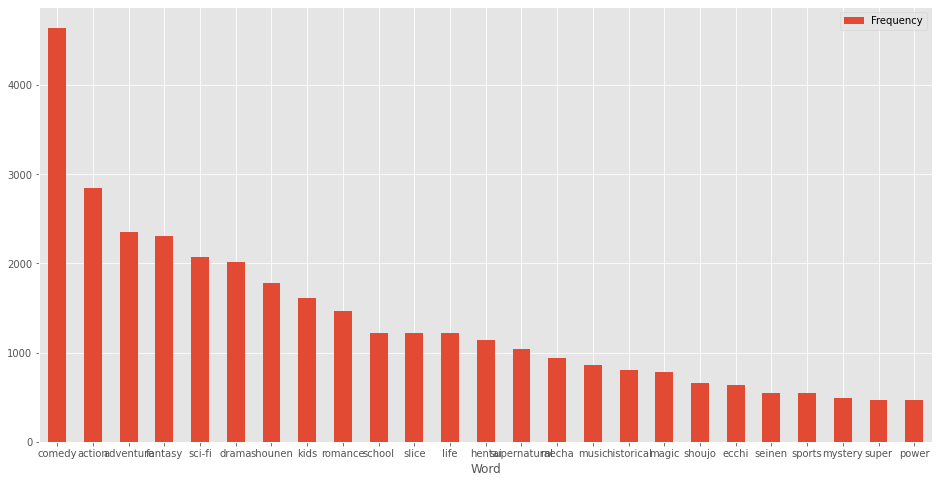

In [31]:
top_N = 25

txt = animes.genre.str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
stopwords = stopwords + [')', '(', ',', ':', "'s", '.', '!', '&', '?']
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies:')
print('=' * 60)
rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word').head(25)
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

matplotlib.style.use('ggplot')
rslt.plot.bar(rot=0, figsize=(16, 8), fontsize=10)